# 第7章 卷积神经网络


## 7.1 整体结构


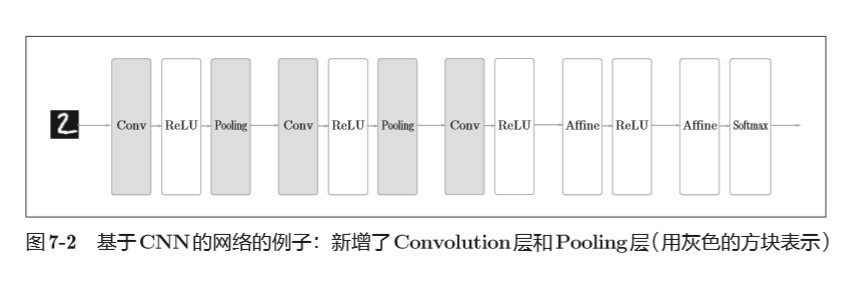

如图7-2所示，CNN中新增了Convolution层和Pooling层。CNN的 层的连接顺序是“Convolution - ReLU -（Pooling）”（ Pooling层有时会被省 略）。这可以理解为之前的“Affi  ne - ReLU”连接被替换成了“Convolution - ReLU -（Pooling）”连接。 

还需要注意的是，在图7-2的CNN中，靠近输出的层中使用了之前 的“ Affi  ne - ReLU”组合。此外，最后的输出层中使用了之前的“Affi  ne - Softmax”组合。这些都是一般的CNN中比较常见的结构。


## 7.2 卷积层


CNN中出现了一些特有的术语，比如填充、步幅等。此外，各层中传 递的数据是有形状的数据（比如，3维数据），这与之前的全连接网络不同， 因此刚开始学习CNN时可能会感到难以理解。本节我们将花点时间，认真 学习一下CNN中使用的卷积层的结构。

### 7.2.1　全连接层存在的问题


全连接层存在什么问题呢？那就是数据的形状被“忽视”了。比如，输 入数据是图像时，图像通常是高、长、通道方向上的3维形状。但是，向全 连接层输入时，需要将3维数据拉平为1维数据。实际上，前面提到的使用 了MNIST数据集的例子中，输入图像就是1通道、高28像素、长28像素 的（1, 28, 28）形状，但却被排成1列，以784个数据的形式输入到最开始的 Affine层。 

图像是3维形状，这个形状中应该含有重要的空间信息。比如，空间上 邻近的像素为相似的值、RGB的各个通道之间分别有密切的关联性、相距 较远的像素之间没有什么关联等，3维形状中可能隐藏有值得提取的本质模 式。但是，因为全连接层会忽视形状，将全部的输入数据作为相同的神经元 （同一维度的神经元）处理，所以无法利用与形状相关的信息。 

而卷积层可以保持形状不变。当输入数据是图像时，卷积层会以3维 数据的形式接收输入数据，并同样以3维数据的形式输出至下一层。因此， 在CNN中，可以（有可能）正确理解图像等具有形状的数据。 

另外，CNN中，有时将卷积层的输入输出数据称为特征图（feature map）。其中，卷积层的输入数据称为输入特征图（input feature map），输出 数据称为输出特征图（output feature map）。本书中将“输入输出数据”和“特 征图”作为含义相同的词使用。


### 7.2.2　卷积运算


卷积层进行的处理就是卷积运算。卷积运算相当于图像处理中的“滤波 器运算”。在介绍卷积运算时，我们来看一个具体的例子（图7-3）。

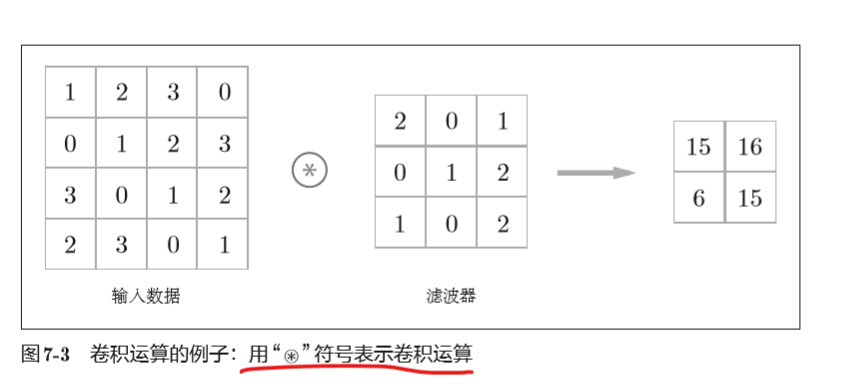

如图7-3所示，卷积运算对输入数据应用滤波器。在这个例子中，输入 数据是有高长方向的形状的数据，滤波器也一样，有高长方向上的维度。假 设用（height, width）表示数据和滤波器的形状，则在本例中，输入大小是 (4, 4)，滤波器大小是(3, 3)，输出大小是(2, 2)。另外，有的文献中也会用“核” 这个词来表示这里所说的“滤波器”。 

对于输入数据，卷积运算以一定间隔滑动滤波器的窗口并应用。这里所 说的窗口是指图7-4中灰色的3×3的部分。如图7-4所示，将各个位置上滤 波器的元素和输入的对应元素相乘，然后再求和（有时将这个计算称为乘积 累加运算）。然后，将这个结果保存到输出的对应位置。将这个过程在所有 位置都进行一遍，就可以得到卷积运算的输出。

在全连接的神经网络中，除了权重参数，还存在偏置。CNN中，滤波 器的参数就对应之前的权重。并且，CNN中也存在偏置。图7-3的卷积运算 的例子只展示到了应用滤波器的阶段。包含偏置的卷积运算的处理流如图7-5 所示。 

如图7-5所示，向应用了滤波器的数据加上了偏置。偏置通常只有1个 （1×1）（本例中，相对于应用了滤波器的4个数据，偏置只有1个），这个值 会被加到应用了滤波器的所有元素上。

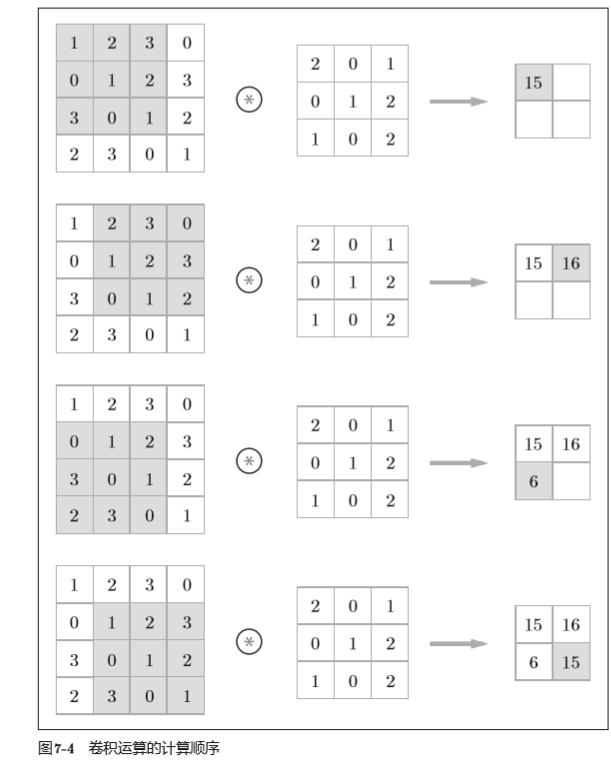

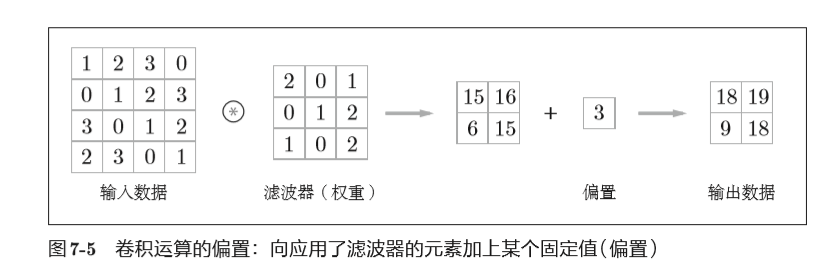

### 7.2.3　填充


在进行卷积层的处理之前，有时要向输入数据的周围填入固定的数据（比 如0等），这称为填充（padding），是卷积运算中经常会用到的处理。比如， 在图7-6的例子中，对大小为(4, 4)的输入数据应用了幅度为1的填充。“幅 度为1的填充”是指用幅度为1像素的0填充周围。


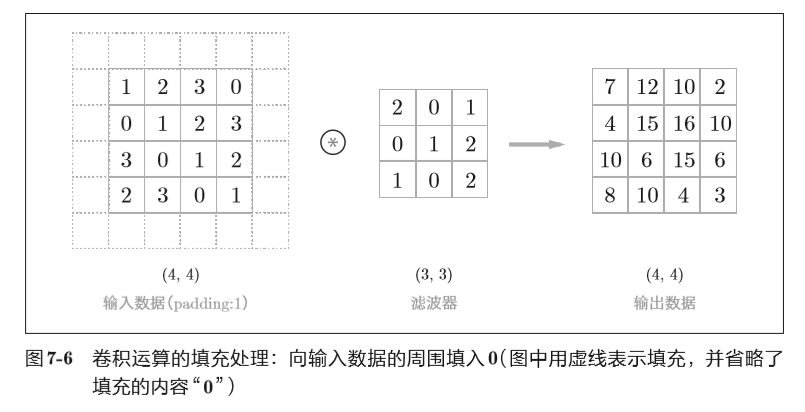

如图7-6所示，通过填充，大小为(4, 4)的输入数据变成了(6,6)的形状。 然后，应用大小为(3, 3)的滤波器，生成了大小为(4,4)的输出数据。这个例 子中将填充设成了1，不过填充的值也可以设置成2、3等任意的整数。在图7-5 的例子中，如果将填充设为2，则输入数据的大小变为(8,8)；如果将填充设 为3，则大小变为(10, 10)。

使用填充主要是为了调整输出的大小。比如，对大小为(4, 4)的输入 数据应用(3,3)的滤波器时，输出大小变为(2, 2)，相当于输出大小 比输入大小缩小了2个元素。这在反复进行多次卷积运算的深度网 络中会成为问题。为什么呢？因为如果每次进行卷积运算都会缩小 空间，那么在某个时刻输出大小就有可能变为1，导致无法再应用 卷积运算。为了避免出现这样的情况，就要使用填充。在刚才的例 子中，将填充的幅度设为1，那么相对于输入大小(4, 4)，输出大小 也保持为原来的(4, 4)。因此，卷积运算就可以在保持空间大小不变 的情况下将数据传给下一层。


### 7.2.4　步幅


 应用滤波器的位置间隔称为步幅（stride）。之前的例子中步幅都是1，如 果将步幅设为2，则如图7-7所示，应用滤波器的窗口的间隔变为2个元素。


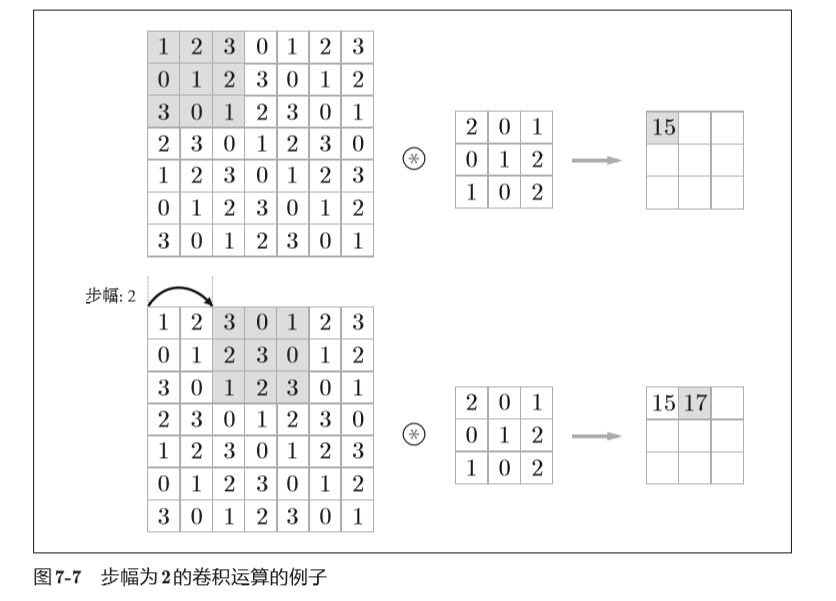

在图7-7的例子中，对输入大小为(7, 7)的数据，以步幅2应用了滤波器。 通过将步幅设为2，输出大小变为(3, 3)。像这样，步幅可以指定应用滤波器 的间隔。 

综上，增大步幅后，输出大小会变小。而增大填充后，输出大小会变大。 如果将这样的关系写成算式，会如何呢？接下来，我们看一下对于填充和步 幅，如何计算输出大小。 

这里，假设输入大小为(H,W)，滤波器大小为(FH,FW)，输出大小为 (OH,OW)，填充为P，步幅为S。此时，输出大小可通过式(7.1)进行计算。
 

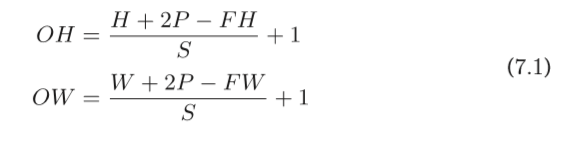

### 7.2.5　3维数据的卷积运算


之前的卷积运算的例子都是以有高、长方向的2维形状为对象的。但是， 图像是3维数据，除了高、长方向之外，还需要处理通道方向。这里，我们按 照与之前相同的顺序，看一下对加上了通道方向的3维数据进行卷积运算的例子。 

图7-8是卷积运算的例子，图7-9是计算顺序。这里以3通道的数据为例， 展示了卷积运算的结果。和2维数据时（图7-3的例子）相比，可以发现纵深 方向（通道方向）上特征图增加了。通道方向上有多个特征图时，会按通道 进行输入数据和滤波器的卷积运算，并将结果相加，从而得到输出。


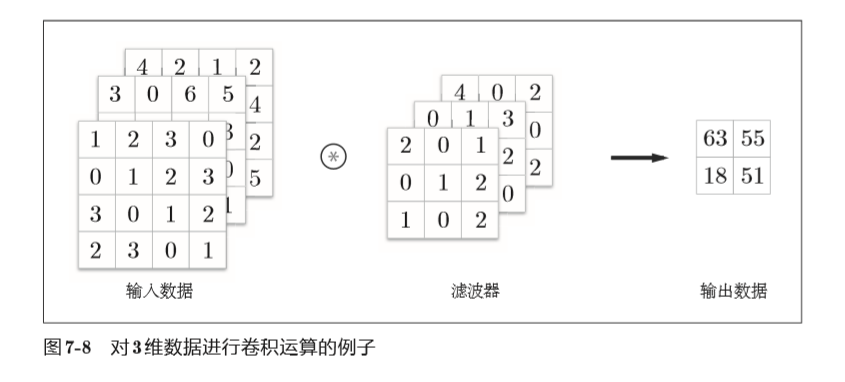

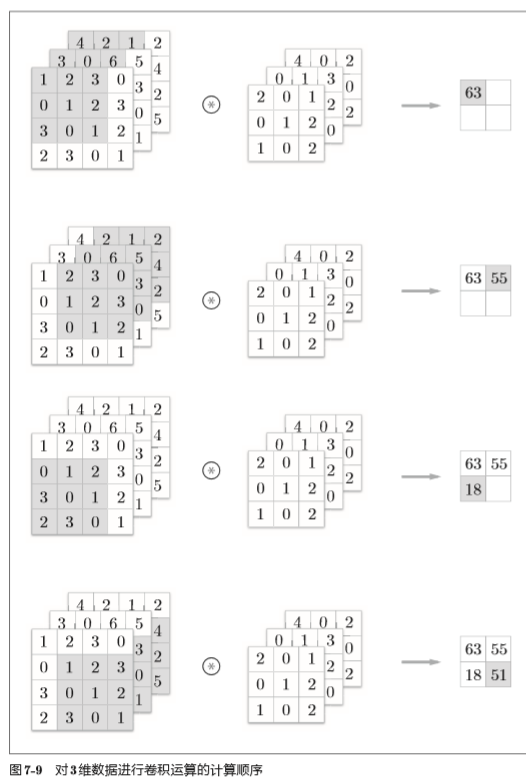

需要注意的是，在3维数据的卷积运算中，输入数据和滤波器的通道数 要设为相同的值。在这个例子中，输入数据和滤波器的通道数一致，均为3。 滤波器大小可以设定为任意值（不过，每个通道的滤波器大小要全部相同）。 这个例子中滤波器大小为(3, 3)，但也可以设定为(2, 2)、(1, 1)、(5, 5)等任 意值。再强调一下，通道数只能设定为和输入数据的通道数相同的值（本例 中为3）。


### 7.2.6　结合方块思考


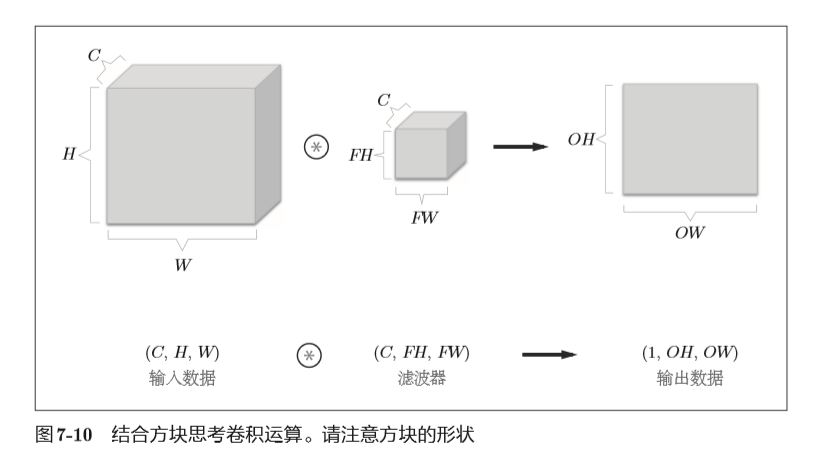

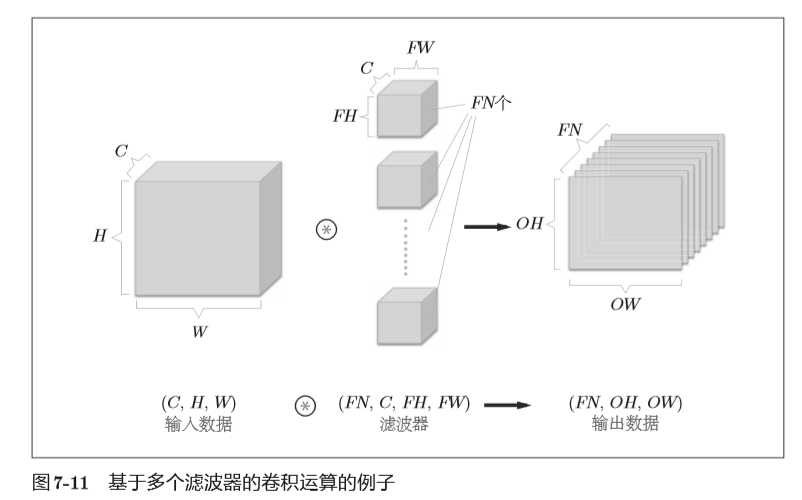

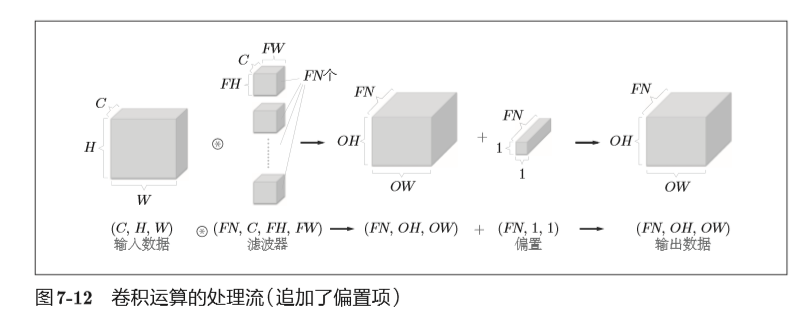

### 7.2.7　批处理


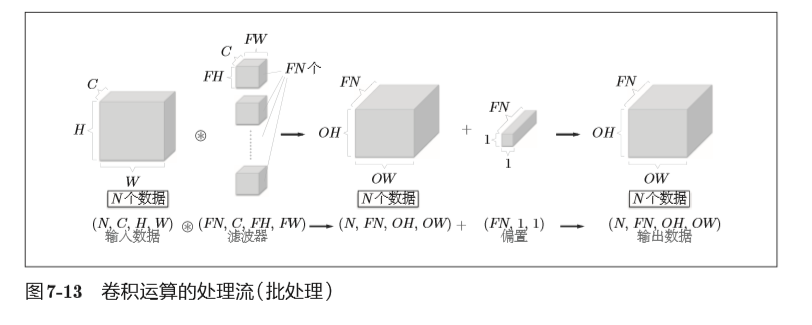

## 7.3 池化层


池化是缩小高、长方向上的空间的运算。比如，如图7-14所示，进行将 2×2的区域集约成1个元素的处理，缩小空间大小。


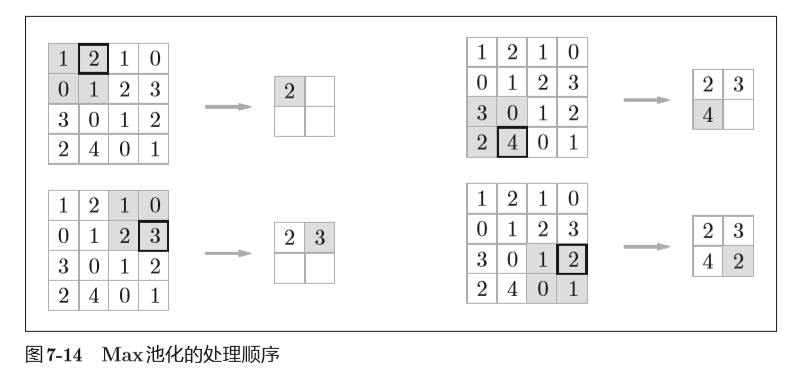

图7-14的例子是按步幅2进行2×2的Max池化时的处理顺序。“Max 池化”是获取最大值的运算，“2×2”表示目标区域的大小。如图所示，从 2×2的区域中取出最大的元素。此外，这个例子中将步幅设为了2，所以 2×2的窗口的移动间隔为2个元素。另外，一般来说，池化的窗口大小会 和步幅设定成相同的值。比如，3×3的窗口的步幅会设为3，4×4的窗口 的步幅会设为4等。


除了Max池化之外，还有Average池化等。相对于Max池化是从 目标区域中取出最大值，Average池化则是计算目标区域的平均值。 在图像识别领域，主要使用Max池化。因此，本书中说到“池化层” 时，指的是Max池化。

池化层的特征


#### 没有要学习的参数 

池化层和卷积层不同，没有要学习的参数。池化只是从目标区域中取最 大值（或者平均值），所以不存在要学习的参数。


#### 通道数不发生变化 

经过池化运算，输入数据和输出数据的通道数不会发生变化。如图7-15 所示，计算是按通道独立进行的。


#### 对微小的位置变化具有鲁棒性（健壮）

输入数据发生微小偏差时，池化仍会返回相同的结果。因此，池化对 输入数据的微小偏差具有鲁棒性。比如，3×3的池化的情况下，如图 7-16所示，池化会吸收输入数据的偏差（根据数据的不同，结果有可 能不一致）。

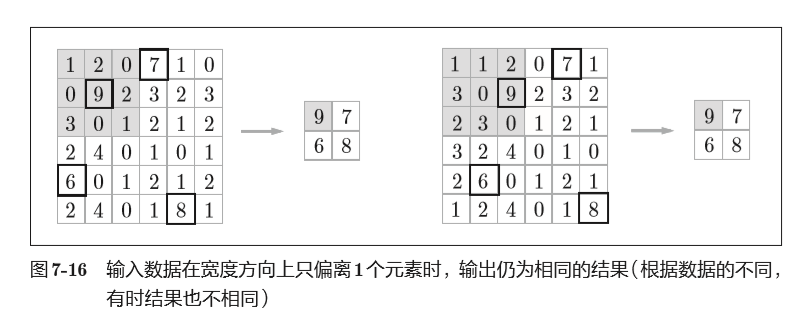

## 7.4 卷积层和池化层的实现


前面我们详细介绍了卷积层和池化层，本节我们就用Python来实现这 两个层。和第5章一样，也给进行实现的类赋予forward和backward方法，并 使其可以作为模块使用。 

大家可能会感觉卷积层和池化层的实现很复杂，但实际上，通过使用某 种技巧，就可以很轻松地实现。本节将介绍这种技巧，将问题简化，然后再 进行卷积层的实现。


### 7.4.1　4维数组


如前所述，CNN中各层间传递的数据是4维数据。所谓4维数据，比如 数据的形状是(10, 1, 28, 28)，则它对应10个高为28、长为28、通道为1的数 据。用Python来实现的话，如下所示。


In [1]:
import numpy as np

In [2]:
x = np.random.rand(10,1,28,28)

In [3]:
x.shape

(10, 1, 28, 28)

In [4]:
x[0].shape

(1, 28, 28)

In [5]:
x[1].shape

(1, 28, 28)

In [7]:
x[0,0]

array([[9.88321802e-01, 2.06355800e-01, 6.72508393e-01, 8.97879533e-01,
        9.58136407e-01, 9.55596682e-01, 3.82049841e-01, 1.57515436e-01,
        7.75975937e-01, 6.89170881e-02, 2.19602042e-01, 4.91446234e-02,
        6.95670108e-01, 2.38243883e-01, 2.04545452e-01, 3.43015470e-01,
        5.21304131e-01, 8.94619882e-01, 5.53512235e-01, 8.36061310e-01,
        7.98424813e-01, 8.77000077e-01, 5.28889540e-01, 6.34594861e-01,
        4.88598877e-01, 2.45060085e-01, 3.24887090e-01, 2.39036933e-01],
       [6.10315634e-01, 7.70061591e-01, 4.83484542e-01, 4.29052001e-01,
        9.88998174e-01, 9.24492882e-01, 3.43284410e-01, 5.59171678e-01,
        4.06682283e-01, 9.74558579e-01, 7.66362505e-01, 9.66785994e-01,
        7.14051528e-01, 6.27980148e-01, 1.00483235e-01, 8.14680033e-01,
        6.13994265e-01, 3.28040285e-01, 4.19609484e-01, 2.23809378e-01,
        3.39708824e-01, 1.32408863e-01, 9.63414823e-01, 1.07721781e-01,
        8.14081495e-01, 3.55146804e-01, 6.85830453e-02, 4.16631

### 7.4.2　基于im2col的展开


如果老老实实地实现卷积运算，估计要重复好几层的for语句。这样的 实现有点麻烦，而且，NumPy中存在使用for语句后处理变慢的缺点（NumPy 中，访问元素时最好不要用for语句）。这里，我们不使用for语句，而是使 用im2col这个便利的函数进行简单的实现。 

im2col是一个函数，将输入数据展开以适合滤波器（权重）。如图7-17所示， 对3维的输入数据应用im2col后，数据转换为2维矩阵（正确地讲，是把包含 批数量的4维数据转换成了2维数据）。


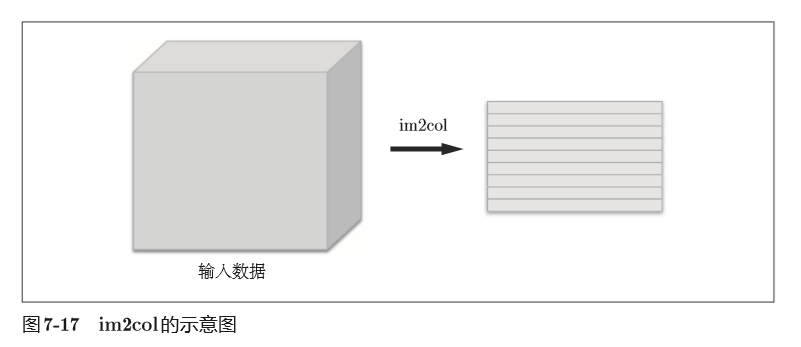

im2col会把输入数据展开以适合滤波器（权重）。具体地说，如图7-18所示， 对于输入数据，将应用滤波器的区域（3维方块）横向展开为1列。im2col会 在所有应用滤波器的地方进行这个展开处理

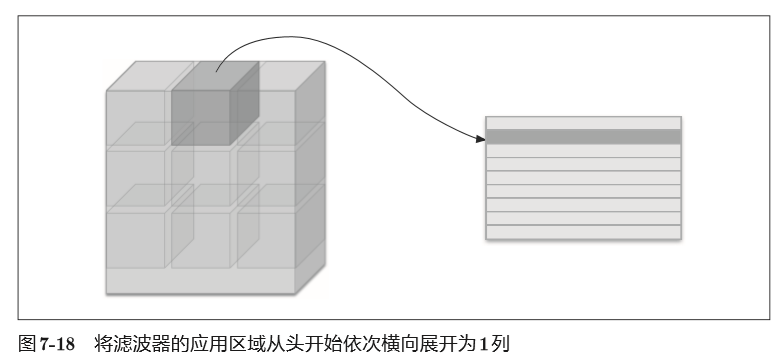

im2col这个名称是“image to column”的缩写，翻译过来就是“从 图像到矩阵”的意思。Caffe、Chainer等深度学习框架中有名为 im2col的函数，并且在卷积层的实现中，都使用了im2col

使用im2col展开输入数据后，之后就只需将卷积层的滤波器（权重）纵 向展开为1列，并计算2个矩阵的乘积即可（参照图7-19）。这和全连接层的 Affi  ne层进行的处理基本相同。 

如图7-19所示，基于im2col方式的输出结果是2维矩阵。因为CNN中 数据会保存为4维数组，所以要将2维输出数据转换为合适的形状。以上就 是卷积层的实现流程。


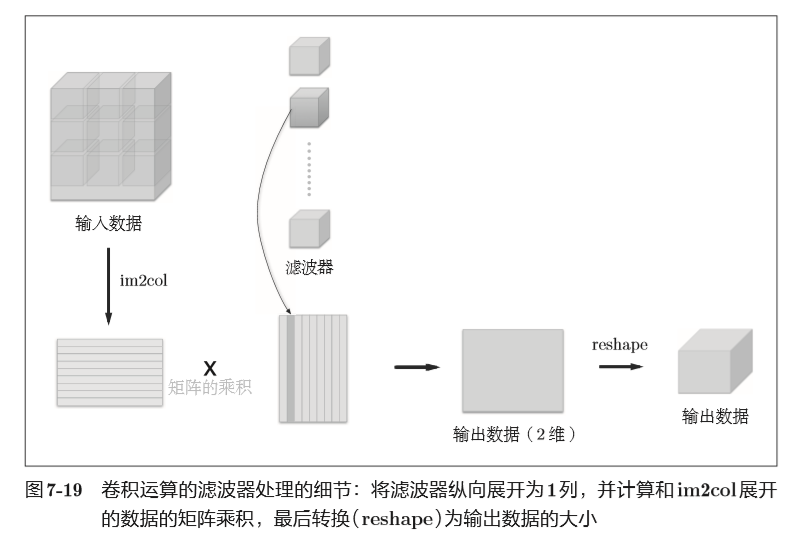

### 7.4.3　卷积层的实现


im2col (input_data, filter_h, filter_w, stride=1, pad=0) 

• input_data―由（数据量，通道，高，长）的 4维数组构成的输入数据 

• filter_h―滤波器的高

• filter_w―滤波器的长 

• stride―步幅 

• pad―填充

In [8]:
def im2col(input_data,filter_h,filter_w,stride = 1,pad = 0):
    """

    Parameters
    ----------
    input_data : 由(数据量, 通道, 高, 长)的4维数组构成的输入数据
    filter_h : 滤波器的高
    filter_w : 滤波器的长
    stride : 步幅
    pad : 填充

    Returns
    -------
    col : 2维数组
    """
    N,C,H,W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    
    img = np.pad(input_data,[(0,0),(0,0),(pad,pad),(pad,pad)],'constant')
    col = np.zeros((N,C,filter_h,filter_w,out_h,out_w))
    
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:,:,y,x,:,:] = img[:,:,y:y_max:stride,x:x_max:stride]
    col = col.transpose(0,4,5,1,2,3).reshape(N*out_h*out_w,-1)
    return col

im2col会考虑滤波器大小、步幅、填充，将输入数据展开为2维数组。现在， 我们来实际使用一下这个im2col。


In [9]:
x1 = np.random.rand(1,3,7,7)
col1 = im2col(x1,5,5,stride = 1,pad=0)
print(col1.shape)

(9, 75)


In [10]:
x2 = np.random.rand(10,3,7,7)
col2 = im2col(x2,5,5,stride = 1,pad =0)
print(col2.shape)

(90, 75)


这里举了两个例子。第一个是批大小为1、通道为3的7×7的数据，第 二个的批大小为10，数据形状和第一个相同。分别对其应用im2col函数，在 这两种情形下，第2维的元素个数均为75。这是滤波器（通道为3、大小为 5×5）的元素个数的总和。批大小为1时，im2col的结果是(9,75)。而第2 个例子中批大小为10，所以保存了10倍的数据，即(90,75)。 现在使用im2col来实现卷积层。这里我们将卷积层实现为名为Convolution 的类

In [11]:
class Convolution:
    def __init__(self,W,b,stride=1,pad = 0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
    
    def forward(self,x):
        FN,C,FH,FW = self.W.shape
        N,C,H,W = x.shape
        out_h = int(1+(H + 2*self.pad - FH)/self.stride)
        out_w = int(1 + (W + 2*self.pad - FW)/self.stride)
        
        col = im2col(x,FH,FW,self.stride,self.pad)
        col_W = self.W.reshape(FN,-1).T
        out = np.dot(col,col_W) + self.b
        
        out = out.reshape(N,out_h,out_w,-1).transpose(0,3,1,2)
        
        return out

展开滤波器的部分（代码段中的粗体字）如图7-19所示，将各个滤波器 的方块纵向展开为1列。这里通过reshape(FN,-1)将参数指定为-1，这是 reshape的一个便利的功能。通过在reshape时指定为-1，reshape函数会自 动计算-1维度上的元素个数，以使多维数组的元素个数前后一致。比如， (10, 3, 5, 5)形状的数组的元素个数共有750个，指定reshape(10,-1)后，就 会转换成(10, 75)形状的数组。 

forward的实现中，最后会将输出大小转换为合适的形状。转换时使用了 NumPy的transpose函数。transpose会更改多维数组的轴的顺序。如图7-20 所示，通过指定从0开始的索引（编号）序列，就可以更改轴的顺序。


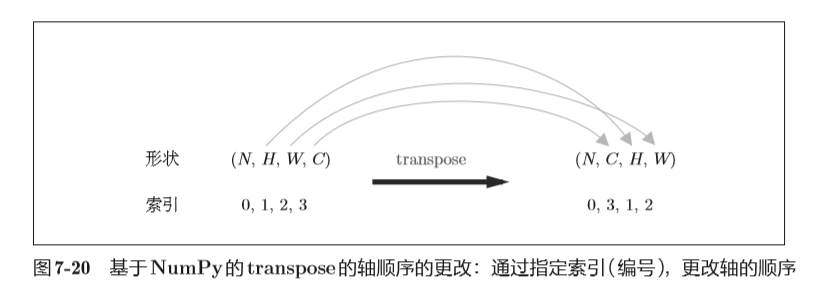

以上就是卷积层的forward处理的实现。通过使用im2col进行展开，基 本上可以像实现全连接层的Affine层一样来实现（5.6节）。接下来是卷积层 的反向传播的实现，因为和Affine层的实现有很多共通的地方，所以就不再 介绍了。但有一点需要注意，在进行卷积层的反向传播时，必须进行im2col 的逆处理。这可以使用本书提供的col2im函数（col2im的实现在common/util.py中）来进行。除了使用col2im这一点，卷积层的反向传播和Affi  ne层的实 现方式都一样。卷积层的反向传播的实现在common/layer.py中，有兴趣的读 者可以参考。


In [12]:
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    col :
    input_shape : 输入数据的形状（例：(10, 1, 28, 28)）
    filter_h :
    filter_w
    stride
    pad

    Returns
    -------

    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

### 7.4.4　池化层的实现

池化层的实现和卷积层相同，都使用im2col展开输入数据。不过，池化 的情况下，在通道方向上是独立的，这一点和卷积层不同。具体地讲，如图 7-21所示，池化的应用区域按通道单独展开。


像这样展开之后，只需对展开的矩阵求各行的最大值，并转换为合适的 形状即可（图7-22）。

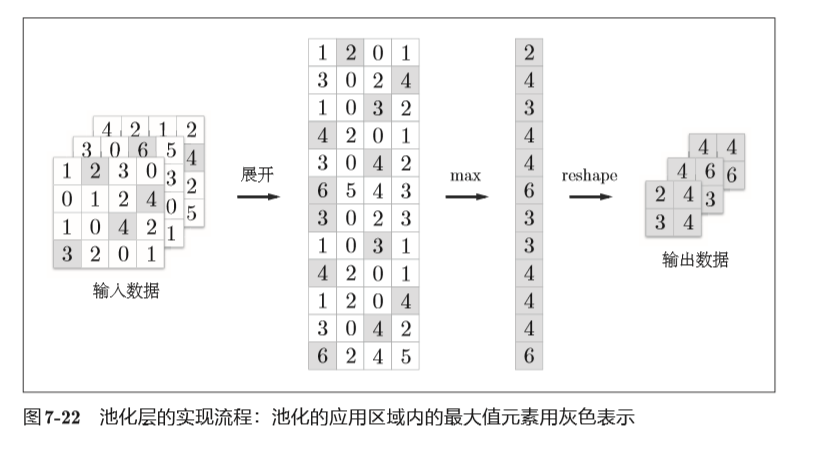

上面就是池化层的forward处理的实现流程。下面来看一下Python的实 现示例。


In [13]:
class Pooling:
    def __init__(self,pool_h,pool_w,stride = 1,pad = 0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
    
    def forward(self,x):
        N,C,H,W = x.shape
        out_h = int(1 + (H - self.pool_h)/self.stride)
        out_w = int(1 + (W - self.pool_w)/self.stride)
        
        #展开(1)
        col = im2col(x,self.pool_h,self.pool_w,self.stride,self.pad)
        col = col.reshape(-1,self.pool_h*self.pool_w)
        
        #最大值(2)
        out = np.max(col,axis = 1)
        #转换(3)
        out = out.reshape(N,out_h,out_w,C).transpose(0,3,1,2)
        return out

如图7-22所示，池化层的实现按下面3个阶段进行。


1.展开输入数据。 2.求各行的最大值。 3.转换为合适的输出大小。


## 7.5 CNN的实现

In [14]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """简单的ConvNet

    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 输入大小（MNIST的情况下为784）
    hidden_size_list : 隐藏层的神经元数量的列表（e.g. [100, 100, 100]）
    output_size : 输出大小（MNIST的情况下为10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 指定权重的标准差（e.g. 0.01）
        指定'relu'或'he'的情况下设定“He的初始值”
        指定'sigmoid'或'xavier'的情况下设定“Xavier的初始值”
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 生成层
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """求损失函数
        参数x是输入数据、t是教师标签
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """求梯度（数值微分）

        Parameters
        ----------
        x : 输入数据
        t : 教师标签

        Returns
        -------
        具有各层的梯度的字典变量
            grads['W1']、grads['W2']、...是各层的权重
            grads['b1']、grads['b2']、...是各层的偏置
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """求梯度（误差反向传播法）

        Parameters
        ----------
        x : 输入数据
        t : 教师标签

        Returns
        -------
        具有各层的梯度的字典变量
            grads['W1']、grads['W2']、...是各层的权重
            grads['b1']、grads['b2']、...是各层的偏置
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 设定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

## 7.6 CNN的可视化


### 7.6.1　第1层权重的可视化

刚才我们对MNIST数据集进行了简单的CNN学习。当时，第1层的 卷积层的权重的形状是(30, 1, 5, 5)，即30个大小为5×5、通道为1的滤波 器。滤波器大小是5×5、通道数是1，意味着滤波器可以可视化为1通道的 灰度图像。现在，我们将卷积层（第1层）的滤波器显示为图像。这里，我 们来比较一下学习前和学习后的权重，结果如图7-24所示（源代码在ch07/ visualize_filter.py中）。 

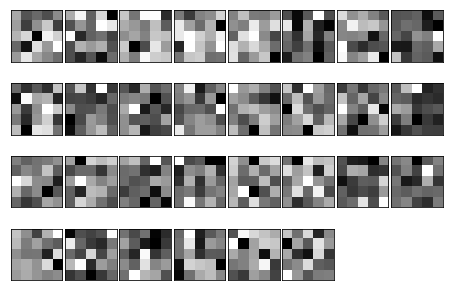

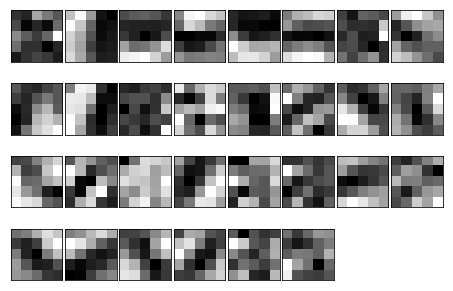

In [19]:
# coding: utf-8
import numpy as np
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 随机进行初始化后的权重
filter_show(network.params['W1'])

# 学习后的权重
network.load_params("params.pkl")
filter_show(network.params['W1'])

图7-24中，学习前的滤波器是随机进行初始化的，所以在黑白的浓淡上 没有规律可循，但学习后的滤波器变成了有规律的图像。我们发现，通过学 习，滤波器被更新成了有规律的滤波器，比如从白到黑渐变的滤波器、含有 块状区域（称为blob）的滤波器等。

如果要问图7-24中右边的有规律的滤波器在“观察”什么，答案就是它 在观察边缘（颜色变化的分界线）和斑块（局部的块状区域）等。比如，左半 部分为白色、右半部分为黑色的滤波器的情况下，如图7-25所示，会对垂直 方向上的边缘有响应。


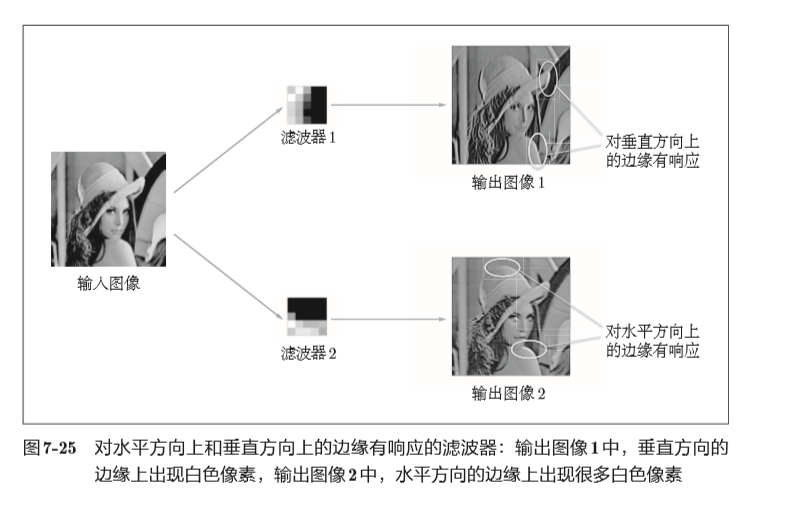

图7-25中显示了选择两个学习完的滤波器对输入图像进行卷积处理时的 结果。我们发现“滤波器1”对垂直方向上的边缘有响应，“滤波器2”对水平 方向上的边缘有响应。 

由此可知，卷积层的滤波器会提取边缘或斑块等原始信息。而刚才实现 的CNN会将这些原始信息传递给后面的层。


### 7.6.2　基于分层结构的信息提取


上面的结果是针对第1层的卷积层得出的。第1层的卷积层中提取了边 缘或斑块等“低级”信息，那么在堆叠了多层的CNN中，各层中又会提取什 么样的信息呢？根据深度学习的可视化相关的研究[17][18]，随着层次加深，提 取的信息（正确地讲，是反映强烈的神经元）也越来越抽象。

图7-26中展示了进行一般物体识别（车或狗等）的8层CNN。这个网络 结构的名称是下一节要介绍的AlexNet。AlexNet网络结构堆叠了多层卷积 层和池化层，最后经过全连接层输出结果。图7-26的方块表示的是中间数据， 对于这些中间数据，会连续应用卷积运算。


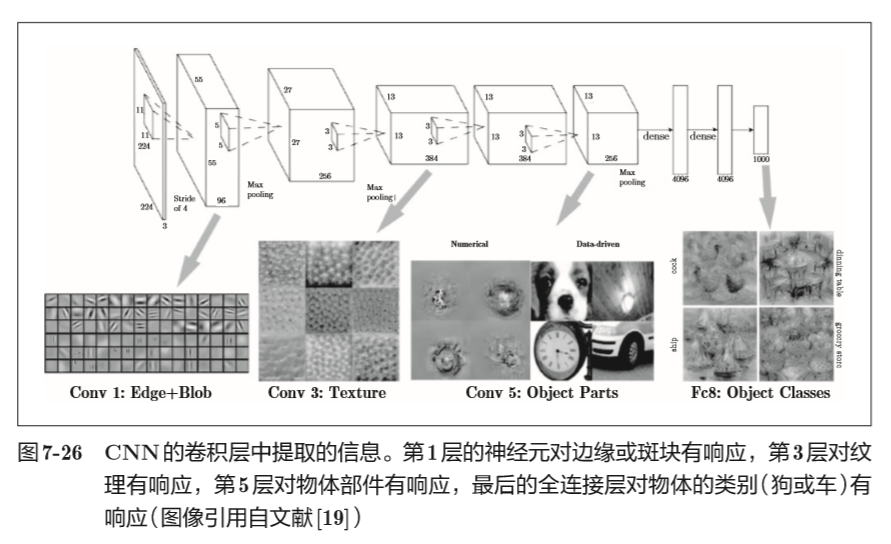

如图7-26所示，如果堆叠了多层卷积层，则随着层次加深，提取的信息 也愈加复杂、抽象，这是深度学习中很有意思的一个地方。最开始的层对简 单的边缘有响应，接下来的层对纹理有响应，再后面的层对更加复杂的物体 部件有响应。也就是说，随着层次加深，神经元从简单的形状向“高级”信息 变化。换句话说，就像我们理解东西的“含义”一样，响应的对象在逐渐变化。


## 小结


本章介绍了CNN。构成CNN的基本模块的卷积层和池化层虽然有些复 杂，但是一旦理解了，之后就只是如何使用它们的问题了。本章为了使读者 在实现层面上理解卷积层和池化层，花了不少时间进行介绍。在图像处理领 域，几乎毫无例外地都会使用CNN。请扎实地理解本章的内容，然后进入 最后一章的学习。
